In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
path = 'C:/Users/elgha/Documents/GitHub/Machine_Learning_OpenClassrooms/Customer Segmentation/data/'
#path2 = 'C:\Users\elgha\Documents\GitHub\Machine_Learning_OpenClassrooms\Customer Segmentation\data'
olist_customers_dataset = pd.read_csv(path + 'olist_customers_dataset.csv', sep=',')
olist_geolocation_dataset = pd.read_csv(path + 'olist_geolocation_dataset.csv', sep=',')
olist_order_items_dataset = pd.read_csv(path + 'olist_order_items_dataset.csv', sep=',')
olist_order_payments_dataset = pd.read_csv(path + 'olist_order_payments_dataset.csv', sep=',')
olist_order_reviews_dataset = pd.read_csv(path + 'olist_order_reviews_dataset.csv', sep=',')
olist_orders_dataset = pd.read_csv(path + 'olist_orders_dataset.csv', sep=',')
olist_products_dataset = pd.read_csv(path + 'olist_products_dataset.csv', sep=',')
olist_sellers_dataset = pd.read_csv(path + 'olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv(path + 'product_category_name_translation.csv', sep=',')


All_Datasets = {'olist_customers_dataset' : olist_customers_dataset, 'olist_geolocation_dataset' : olist_geolocation_dataset, 'olist_order_items_dataset' : olist_order_items_dataset, 'olist_order_payments_dataset' : olist_order_payments_dataset, 'olist_order_reviews_dataset' : olist_order_reviews_dataset, 'olist_orders_dataset' : olist_orders_dataset, 'olist_products_dataset' : olist_products_dataset, 'olist_sellers_dataset' : olist_sellers_dataset, 'product_category_name_translation' : product_category_name_translation}


In [6]:
# Befor merge the data we need to see our connection between files csv (databases connection)
for key,value in All_Datasets.items():
    value.info()
    print('------------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             10001

## Voici l'ordre des jointures que nous allons realiser :

    - Olist_cstomers_dataset et olist_orders_dataset
    - Olist_orders_items sur la resultat de la precedente jointure
    - Olist_products_dataset sur le resultat de la precedente jointure
    - Olist_sellers_dataset sur le resultat de la precedente jointure
    - Olist_order_reviews_dataset sur le resultat de la precedente jointure

   # La presentation generale du dataset
   ## Rechercher de doublons : 
    

In [7]:
# Now we need to merge our data
olist_customers_dataset.duplicated(subset=['customer_unique_id']).sum()


3345

In [8]:
# Suppression de doublons en gardant le dernier
#xolist_customers_dataset=xolist_customers_dataset.drop_duplicates(subset=['customer_unique_id'], keep='last')
#xolist_customers_dataset

Diagramme secteurs customer_city:
 Commentaire


C:\Users\elgha\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


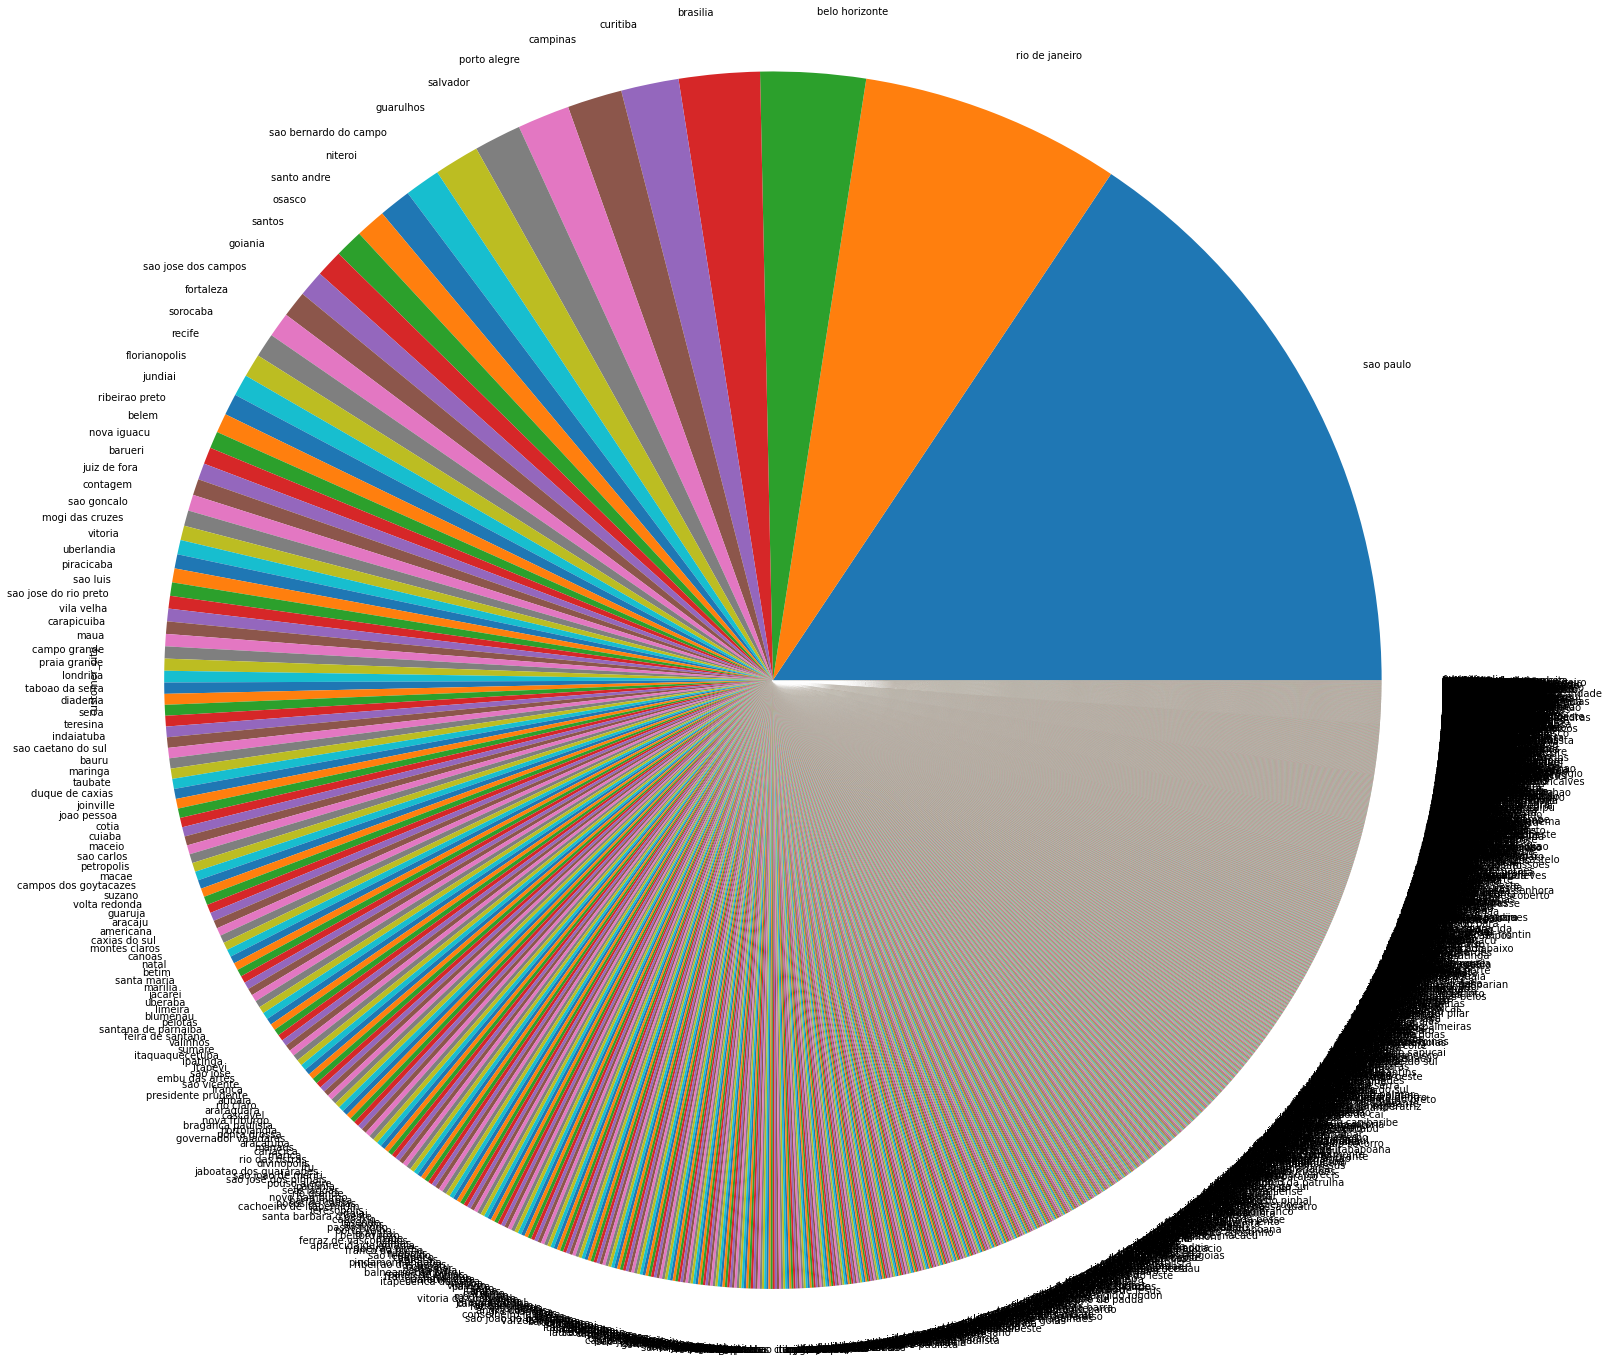

Diagramme secteurs customer_state :
 Commentaire


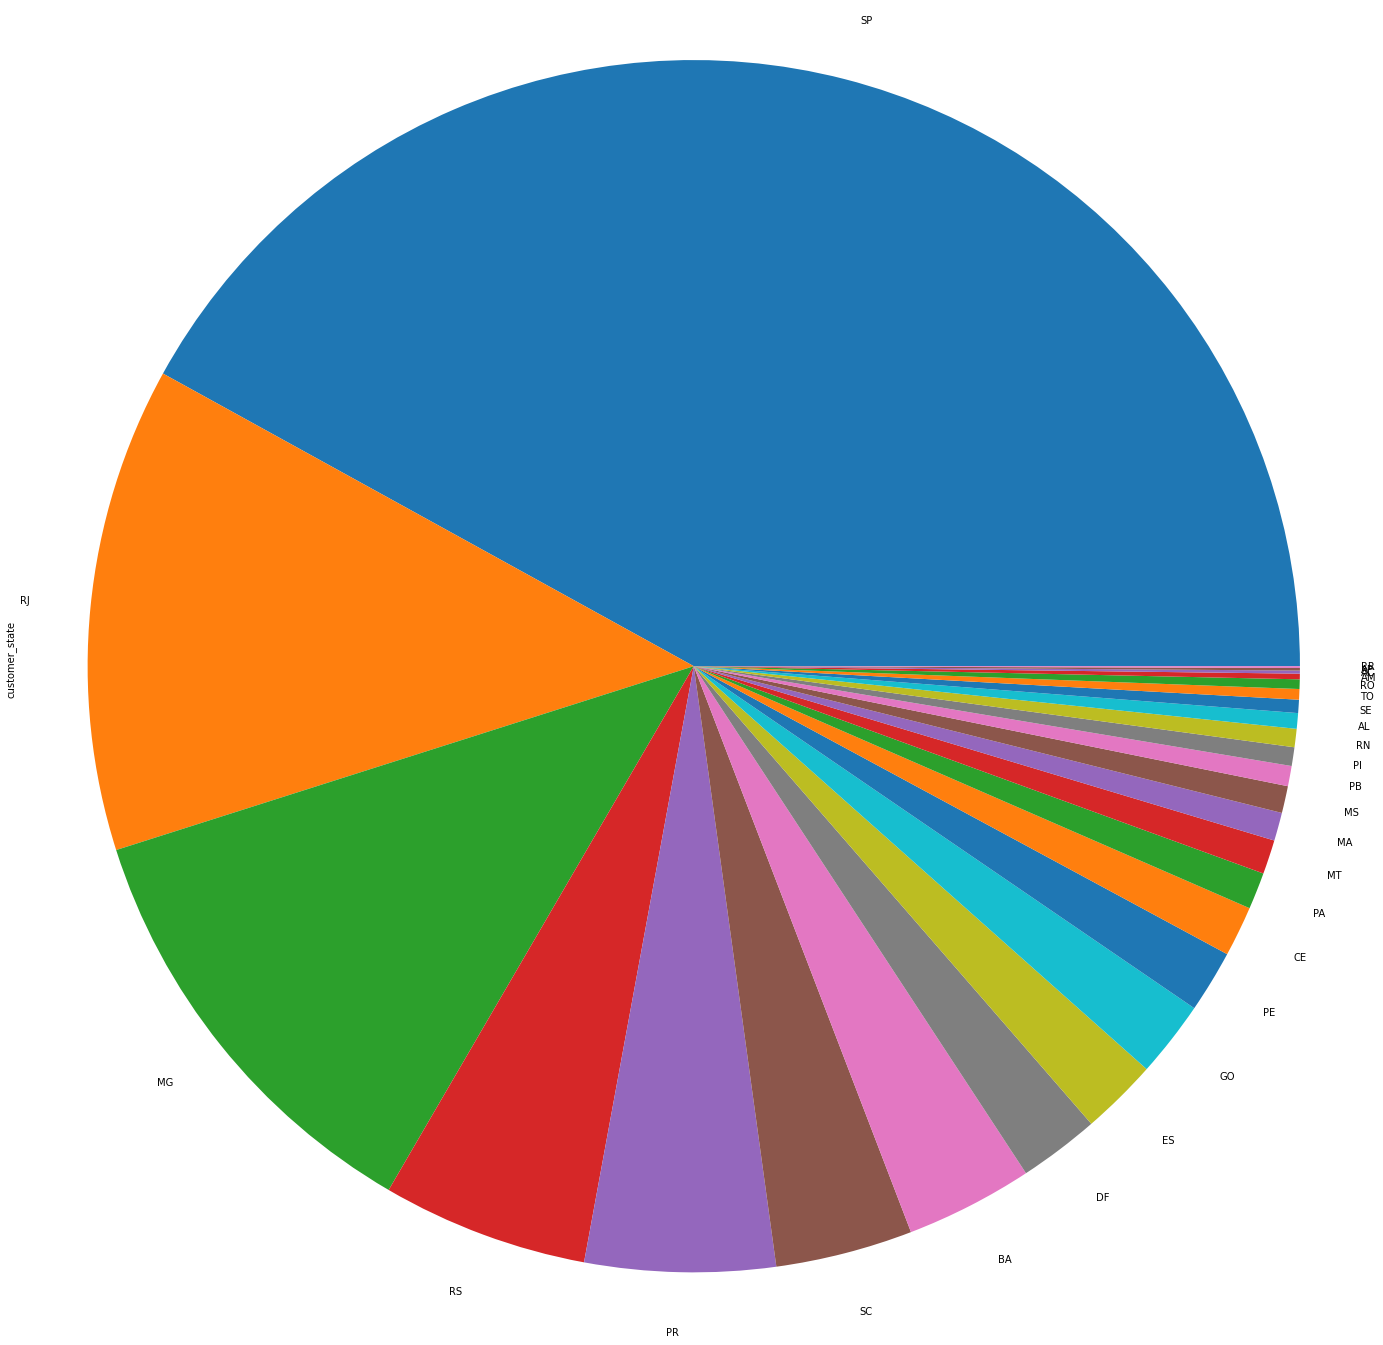

In [19]:
# VARIABLE QUALITATIVE
# Diagramme en secteurs
print('Diagramme secteurs customer_city:')
print(' Commentaire')
fig = plt.figure(figsize=(24, 24))
df2 = olist_customers_dataset[olist_customers_dataset["customer_city"] != "none"]
df2["customer_city"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique
# VARIABLE QUALITATIVE
# Diagramme en secteurs
print('Diagramme secteurs customer_state :')
print(' Commentaire')

fig = plt.figure(figsize=(24, 24))
df1 = olist_customers_dataset[olist_customers_dataset["customer_state"] != "none"]
df1["customer_state"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal')
plt.show() # Affiche le graphique


Diagramme barre horizontale customer_state

Commentaire.



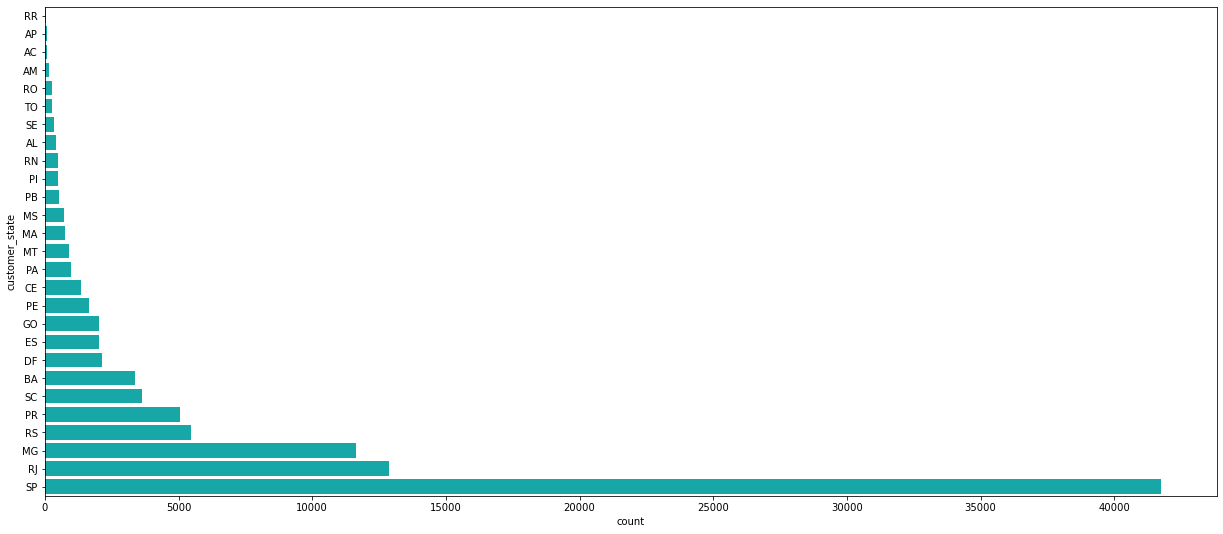

In [23]:
print ('Diagramme barre horizontale customer_state\n')
print('Commentaire.\n')
f, ax = plt.subplots(figsize = (21, 9))
sns.countplot(y="customer_state", data=olist_customers_dataset, order=olist_customers_dataset['customer_state'].value_counts().sort_values().index, color="c");

In [26]:
from sklearn.preprocessing import LabelEncoder
olist_customers_dataset1 = olist_customers_dataset
labelencoder=LabelEncoder()
for col in olist_customers_dataset1.columns:
    if olist_customers_dataset1[col].dtype == 'object':
        olist_customers_dataset1[col] = labelencoder.fit_transform(olist_customers_dataset1[col])

olist_customers_dataset1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,2610,50396,14409,1382,25
1,9561,15433,9790,3428,25
2,30460,2272,1151,3597,25
3,69605,14192,8775,2341,25
4,30707,19733,13056,707,25


In [ ]:
# Import Individuals data

import pandas as pd

NewIndividuals = pd.read_csv('/content/IndividualsRFM_Categories.csv', sep=',')
NewIndividuals = NewIndividuals.iloc[:,1::]

NewIndividuals.columns = ['customer_unique_id', 'Frequency', 'Recency', 'Amount', 'Mean_review_score', 'City', 'State', 'Payment_Type', 'Category']


# Change Rencency into numeric (number of days passed since 31/12/2015)

from sklearn.decomposition import KernelPCA
from datetime import datetime
from datetime import date

NewIndividuals['Recency'] = pd.to_datetime(NewIndividuals['Recency'], format='%Y-%m-%d %H:%M:%S')

NewIndividuals['Year'] = NewIndividuals['Recency'].dt.strftime('%Y')
NewIndividuals = NewIndividuals.dropna(subset=['Year'])
NewIndividuals['Year'] = pd.to_numeric(NewIndividuals['Year'])
NewIndividuals['Year'] = NewIndividuals['Year'] - NewIndividuals['Year'].min()

NewIndividuals['Months'] = NewIndividuals['Recency'].dt.strftime('%m')
NewIndividuals = NewIndividuals.dropna(subset=['Months'])
NewIndividuals['Months'] = pd.to_numeric(NewIndividuals['Months'])

NewIndividuals['Days'] = NewIndividuals['Recency'].dt.strftime('%d')
NewIndividuals = NewIndividuals.dropna(subset=['Days'])
NewIndividuals['Days'] = pd.to_numeric(NewIndividuals['Days'])

NewIndividuals['NumRecency'] = 365*NewIndividuals['Year'] + 30*NewIndividuals['Months'] + NewIndividuals['Days']

NewIndividuals['Year'] = NewIndividuals['Recency'].dt.strftime('%Y')
NewIndividuals['Year'] = pd.to_numeric(NewIndividuals['Year'])

NewIndividuals['Months'] = NewIndividuals['Recency'].dt.strftime('%m')
NewIndividuals['Months'] = pd.to_numeric(NewIndividuals['Months'])

NewIndividuals['Days'] = NewIndividuals['Recency'].dt.strftime('%d')
NewIndividuals['Days'] = pd.to_numeric(NewIndividuals['Days'])

NewIndividuals = NewIndividuals[['customer_unique_id', 'Year', 'Months', 'Days', 'Recency', 'Frequency', 'NumRecency', 'Amount', 'Mean_review_score', 'City', 'State', 'Payment_Type', 'Category']]
